# Titanic Data : Logistic Regression

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.preprocessing import LabelEncoder #1-hot encoder (Categorical --> Binary Hot Encoding)
from sklearn.model_selection import train_test_split #train test split
from sklearn.linear_model import LogisticRegression #call the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score #CrossValidation
from sklearn.metrics import classification_report

In [5]:
df_titanic = pd.read_csv('train.csv')

In [6]:
df_titanic.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

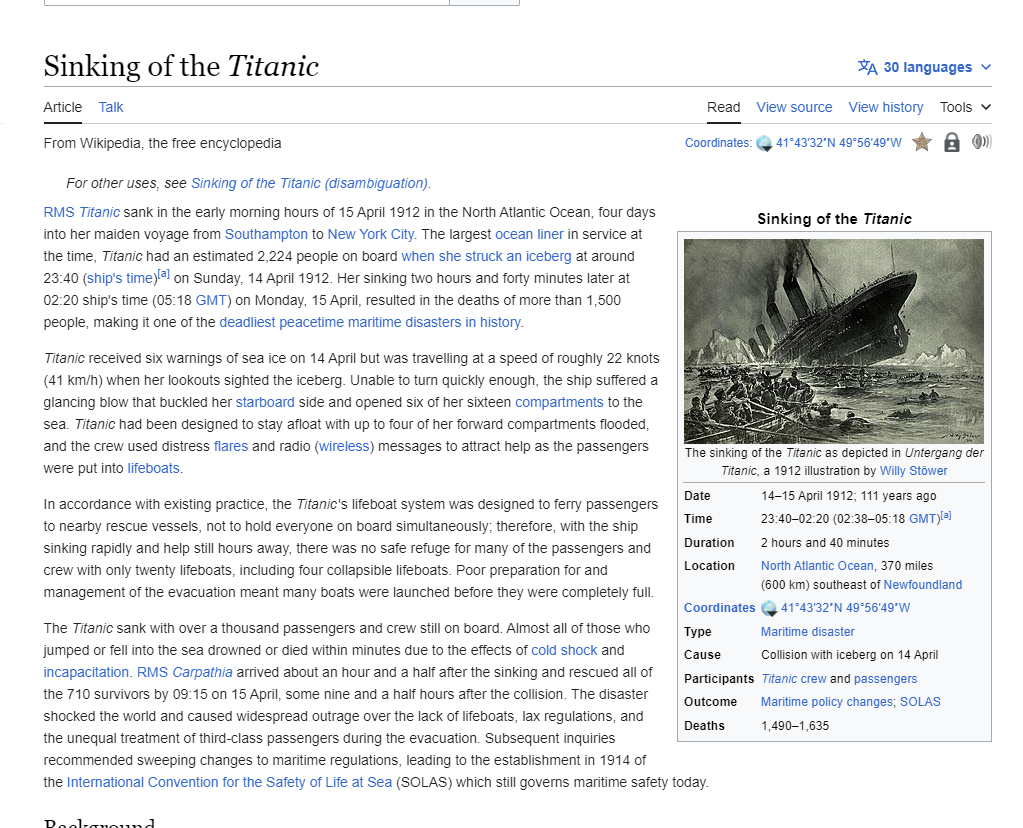

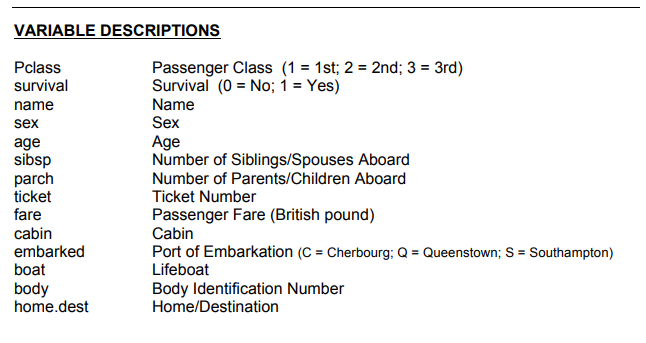

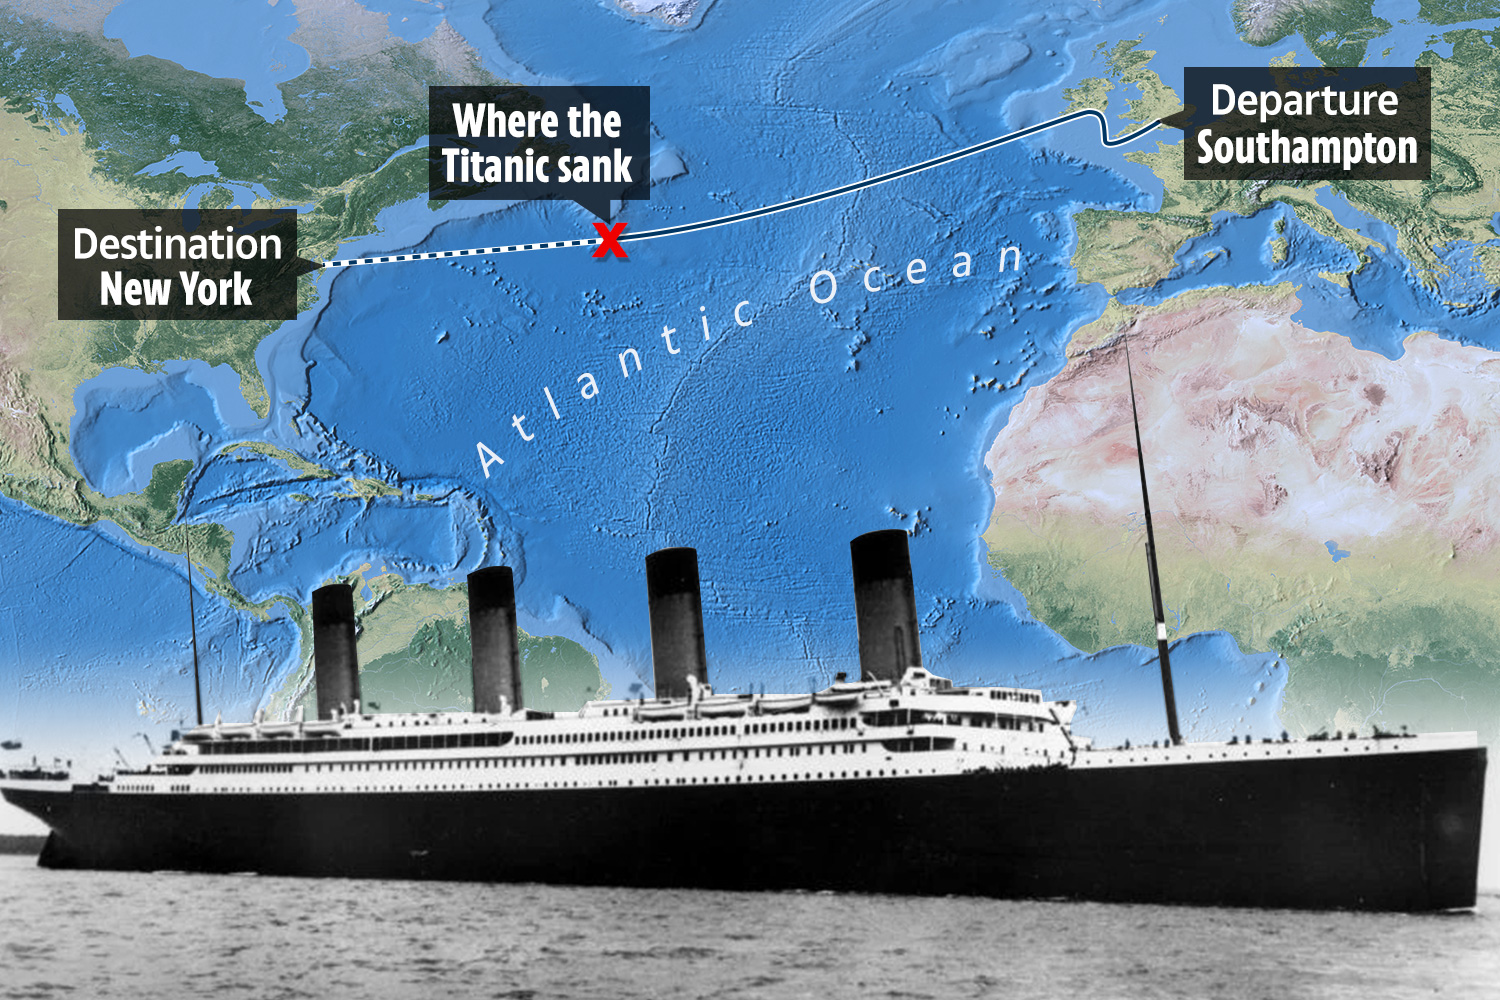

# Exploratory Data Analysis 

In [7]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Identify the missing values

In [8]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df_titanic.isna().sum()/len(df_titanic)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

**Takeway from training dataset: Three columns `Age`, `Cabin`, `Embarked` have missing values**

### `Tasks`

1. Drop the `cabin` column from the data as it has 77% missing data
2. Impute `Age` with the average age per `Pclass`
3. Impute `Embarked` with the mode

4. Detailed `EDA on different variables` to understand their relationship

In [10]:
df_titanic

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [11]:
df_titanic.drop('Cabin', axis=1, inplace=True)

In [12]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

### Handling the age column - missing records

#### - Impute the ages with the average per class

In [13]:
def impute_age(col):
    Age = col[0]#to select the column for imputation
    Pclass = col[1]
    if pd.isnull(Age):
        return (df_titanic[df_titanic['Pclass']==Pclass]['Age'].mean())
    else:
        return Age

In [14]:
df_titanic_sub = df_titanic[['Age', 'Pclass']]

In [15]:
df_titanic_sub

Age  Pclass
0    22.0       3
1    38.0       1
2    26.0       3
3    35.0       1
4    35.0       3
..    ...     ...
886  27.0       2
887  19.0       1
888   NaN       3
889  26.0       1
890  32.0       3

[891 rows x 2 columns]

In [16]:
df_titanic['Age'] = df_titanic[['Age', 'Pclass']].apply(impute_age, axis=1)

In [17]:
df_titanic[['Age', 'Pclass']]

Age  Pclass
0    22.00000       3
1    38.00000       1
2    26.00000       3
3    35.00000       1
4    35.00000       3
..        ...     ...
886  27.00000       2
887  19.00000       1
888  25.14062       3
889  26.00000       1
890  32.00000       3

[891 rows x 2 columns]

In [19]:
df_titanic_sub[df_titanic_sub['Pclass']==3]['Age'].mean()

25.14061971830986

In [20]:
df_titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

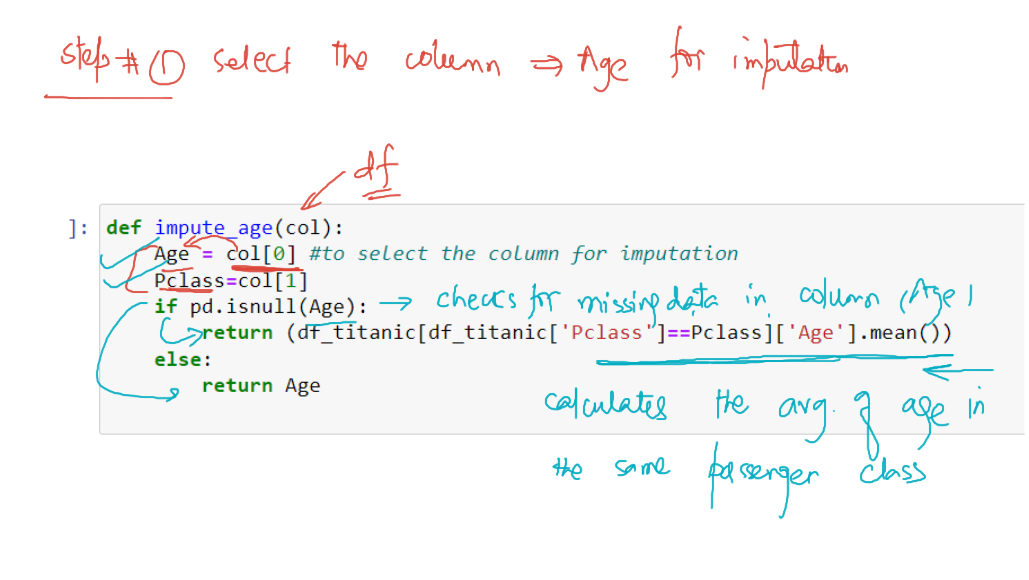

### Handling the Embarked column

- There are just `two` missing records, we will impute it with the `mode` of the embarked column

In [23]:
df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0], inplace=True)

In [22]:
df_titanic['Embarked'].mode()[0]

'S'

In [24]:
df_titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Examine the distribution of `Target` column

In [25]:
df_titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### Plot the count of survived wrt `sex`

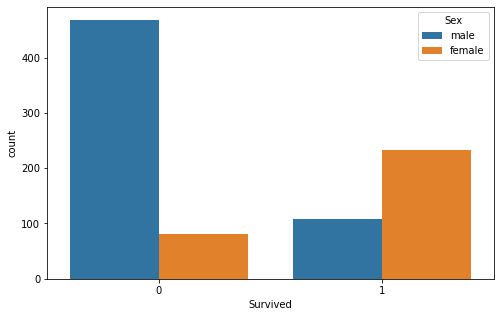

In [27]:
plt.subplots(figsize=(8,5))
sns.countplot(x='Survived', hue='Sex', data=df_titanic)
plt.show()

#### Observation: `sex` is the one of the key variables for the survival

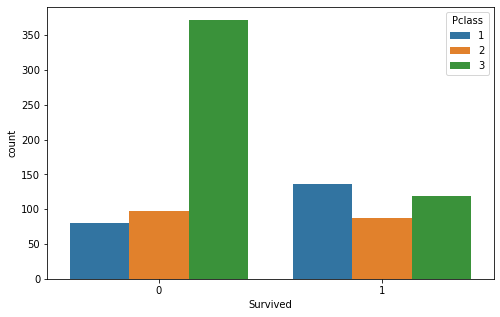

In [28]:
plt.subplots(figsize=(8,5))
sns.countplot(x='Survived', hue='Pclass', data=df_titanic)
plt.show()

In [29]:
df_titanic.groupby(['Survived', 'Pclass', 'Sex']).agg(
Total_Count = ('Pclass', 'count')).reset_index()

Survived  Pclass     Sex  Total_Count
0          0       1  female            3
1          0       1    male           77
2          0       2  female            6
3          0       2    male           91
4          0       3  female           72
5          0       3    male          300
6          1       1  female           91
7          1       1    male           45
8          1       2  female           70
9          1       2    male           17
10         1       3  female           72
11         1       3    male           47

### Encoding Categorical Variables

- It is the process of converting categorical data (represents categories/labels) into a numerical format that can be used in ML algos
- A. **Label Encoding**: Assign a unique numerical label to each category. Order of the labels may be arbitrary

    `Example: Category A--> 0, B---> 1, C-->2`
    
- B. **One Hot Encoding**: Creates binary columns for each category. Leads to `high dimensional feature space`

  
       

In [31]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


- We have categorical variables such as `Sex`, `Embarked`, `Pclass`

In [32]:
def create_encoding(df, col_name):
    dummies = pd.get_dummies(df[col_name], prefix=col_name)
    df=pd.concat([df, dummies], axis=1)
    return df

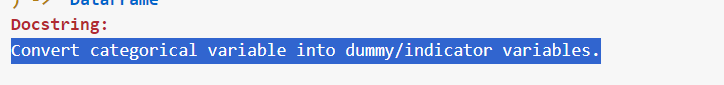

In [33]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [34]:
df_titanic.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Embarked  
0      0  A/5 21171   7.2500        S  
1      0   PC 17599  71.2833        C

In [35]:
sel_col = [ 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked']

In [43]:
df_titanic_final = df_titanic[sel_col]

In [44]:
df_titanic_final

Survived  Pclass     Sex       Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.00000      1      0   7.2500        S
1           1       1  female  38.00000      1      0  71.2833        C
2           1       3  female  26.00000      0      0   7.9250        S
3           1       1  female  35.00000      1      0  53.1000        S
4           0       3    male  35.00000      0      0   8.0500        S
..        ...     ...     ...       ...    ...    ...      ...      ...
886         0       2    male  27.00000      0      0  13.0000        S
887         1       1  female  19.00000      0      0  30.0000        S
888         0       3  female  25.14062      1      2  23.4500        S
889         1       1    male  26.00000      0      0  30.0000        C
890         0       3    male  32.00000      0      0   7.7500        Q

[891 rows x 8 columns]

In [45]:
for col in ['Pclass', 'Sex','Embarked']:
    df_titanic_final = create_encoding(df_titanic_final,col)

In [46]:
df_titanic_final

Survived  Pclass     Sex       Age  SibSp  Parch     Fare Embarked  \
0           0       3    male  22.00000      1      0   7.2500        S   
1           1       1  female  38.00000      1      0  71.2833        C   
2           1       3  female  26.00000      0      0   7.9250        S   
3           1       1  female  35.00000      1      0  53.1000        S   
4           0       3    male  35.00000      0      0   8.0500        S   
..        ...     ...     ...       ...    ...    ...      ...      ...   
886         0       2    male  27.00000      0      0  13.0000        S   
887         1       1  female  19.00000      0      0  30.0000        S   
888         0       3  female  25.14062      1      2  23.4500        S   
889         1       1    male  26.00000      0      0  30.0000        C   
890         0       3    male  32.00000      0      0   7.7500        Q   

     Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male  Embarked_C  \
0           0         0         1           0         1           0   
1           1         0         0           1         0           1   
2           0         0         1           1         0           0   
3           1         0         0           1         0           0   
4           0         0         1           0         1           0   
..        ...       ...       ...         ...       ...         ...   
886         0         1         0           0         1           0   
887         1         0         0           1         0           0   
888         0         0         1           1         0           0   
889         1         0         0           0         1           1   
890         0         0         1           0         1           0   

     Embarked_Q  Embarked_S  
0             0           1  
1             0           0  
2             0           1  
3             0           1  
4             0           1  
..          ...         ...  
886           0           1  
887           0           1  
888           0           1  
889           0           0  
890           1           0  

[891 rows x 16 columns]

In [47]:
df_titanic_final.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

#### Dropping the unnecessary columns

In [48]:
sel_col_2 = ['Survived',  'Age', 'SibSp', 'Parch', 'Fare','Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

In [49]:
df_titanic_final = df_titanic_final[sel_col_2]

In [50]:
df_titanic_final

Survived       Age  SibSp  Parch     Fare  Pclass_1  Pclass_2  Pclass_3  \
0           0  22.00000      1      0   7.2500         0         0         1   
1           1  38.00000      1      0  71.2833         1         0         0   
2           1  26.00000      0      0   7.9250         0         0         1   
3           1  35.00000      1      0  53.1000         1         0         0   
4           0  35.00000      0      0   8.0500         0         0         1   
..        ...       ...    ...    ...      ...       ...       ...       ...   
886         0  27.00000      0      0  13.0000         0         1         0   
887         1  19.00000      0      0  30.0000         1         0         0   
888         0  25.14062      1      2  23.4500         0         0         1   
889         1  26.00000      0      0  30.0000         1         0         0   
890         0  32.00000      0      0   7.7500         0         0         1   

     Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
0             0         1           0           0           1  
1             1         0           1           0           0  
2             1         0           0           0           1  
3             1         0           0           0           1  
4             0         1           0           0           1  
..          ...       ...         ...         ...         ...  
886           0         1           0           0           1  
887           1         0           0           0           1  
888           1         0           0           0           1  
889           0         1           1           0           0  
890           0         1           0           1           0  

[891 rows x 13 columns]

## Create train and validation sets

In [51]:
input_vars = [ 'Age', 'SibSp', 'Parch', 'Fare','Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

In [53]:
X=df_titanic_final[input_vars]

In [54]:
y=df_titanic_final['Survived']

In [55]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=.20, random_state=45)

In [56]:
train_X

Age  SibSp  Parch      Fare  Pclass_1  Pclass_2  Pclass_3  \
332  38.00000      0      1  153.4625         1         0         0   
281  28.00000      0      0    7.8542         0         0         1   
147   9.00000      2      2   34.3750         0         0         1   
11   58.00000      0      0   26.5500         1         0         0   
405  34.00000      1      0   21.0000         0         1         0   
..        ...    ...    ...       ...       ...       ...       ...   
725  20.00000      0      0    8.6625         0         0         1   
607  27.00000      0      0   30.5000         1         0         0   
544  50.00000      1      0  106.4250         1         0         0   
643  25.14062      0      0   56.4958         0         0         1   
414  44.00000      0      0    7.9250         0         0         1   

     Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
332           0         1           0           0           1  
281           0         1           0           0           1  
147           1         0           0           0           1  
11            1         0           0           0           1  
405           0         1           0           0           1  
..          ...       ...         ...         ...         ...  
725           0         1           0           0           1  
607           0         1           0           0           1  
544           0         1           1           0           0  
643           0         1           0           0           1  
414           0         1           0           0           1  

[712 rows x 12 columns]

### Training the model

In [60]:
log_reg_model_1 = LogisticRegression() #call the model

In [61]:
log_reg_model_1.fit(train_X, train_y)

C:\Users\think\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Validating the model

In [63]:
pred_values = log_reg_model_1.predict(val_X) #predicting on validation set

In [64]:
pred_values

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0], dtype=int64)

### Calculate performance metrics of the model

In [65]:
acc = accuracy_score(val_y, pred_values)

In [66]:
print('Accuracy of the model is:', round(acc*100,2))

Accuracy of the model is: 83.8


In [67]:
accuracy_score

<function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>

https://github.com/scikit-learn/scikit-learn/blob/3f89022fa/sklearn/metrics/_classification.py#L144

### Accuracy = Number of correct predictions / Total number of validation data points

In [70]:
len(val_y)*acc # 150 out of 179 records or data points have been correctly predicted

150.0

### Correlation Matrix

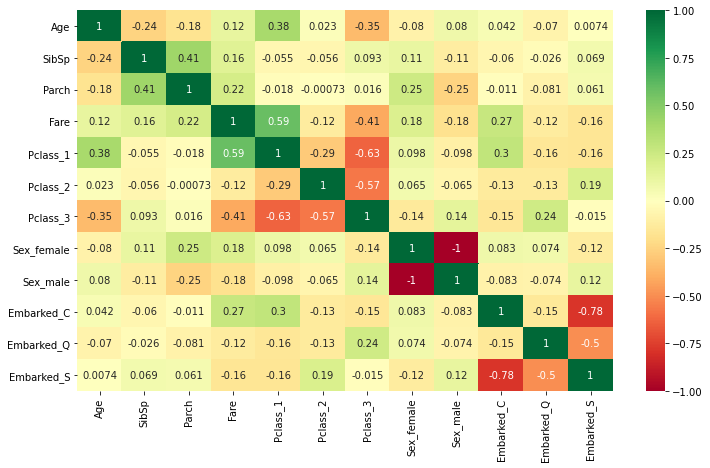

In [76]:
plt.subplots(figsize=(12,7))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

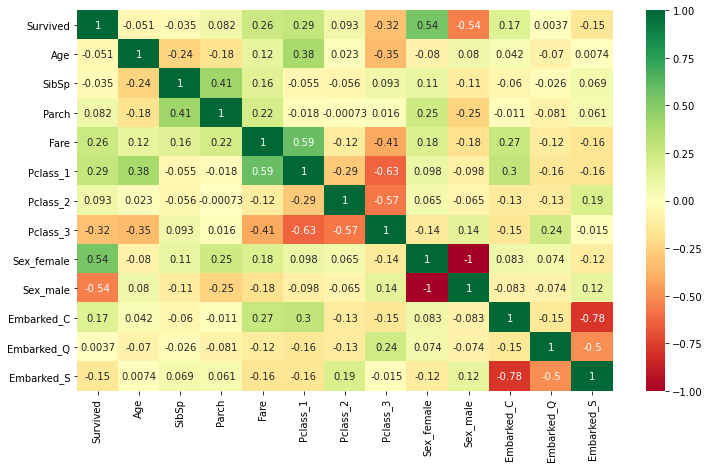

In [77]:
plt.subplots(figsize=(12,7))
sns.heatmap(df_titanic_final.corr(), annot=True, cmap="RdYlGn")
plt.show()

### Feature ranking with recursive feature elimination and cross-validation 

- RFECV performs RFE in a CV loop to find the optimal number or the best number of features

In [79]:
from sklearn.feature_selection import RFECV
### creates the RFE object and compute a cross-validated score
### Uses accuracy scoring

In [90]:
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')

In [91]:
rfecv.fit(X,y)

C:\Users\think\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\think\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\think\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\think\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

RFECV(cv=10, estimator=LogisticRegression(), scoring='accuracy')

https://scikit-learn.org/stable/modules/preprocessing.html

In [92]:
print("Optimal number of features:",rfecv.n_features_)

Optimal number of features: 11


In [93]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         891 non-null    float64
 1   SibSp       891 non-null    int64  
 2   Parch       891 non-null    int64  
 3   Fare        891 non-null    float64
 4   Pclass_1    891 non-null    uint8  
 5   Pclass_2    891 non-null    uint8  
 6   Pclass_3    891 non-null    uint8  
 7   Sex_female  891 non-null    uint8  
 8   Sex_male    891 non-null    uint8  
 9   Embarked_C  891 non-null    uint8  
 10  Embarked_Q  891 non-null    uint8  
 11  Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 34.9 KB


In [94]:
print('Selected features:', list(X.columns[rfecv.support_]))

Selected features: ['Age', 'SibSp', 'Parch', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


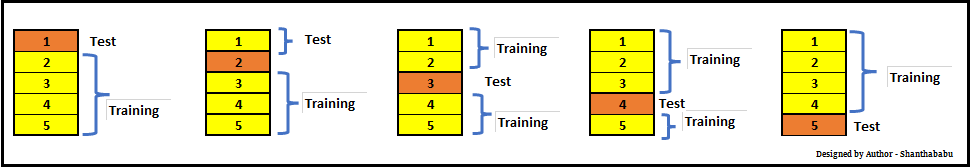

## Scaling and Normalization

#### In scaling, we change the `range of the data`
#### In normalization, we change the `shape of the data`

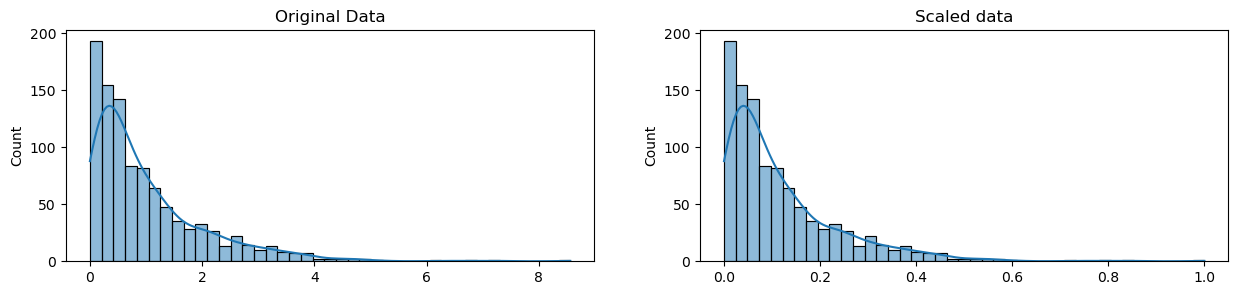

In [95]:
df_titanic_final['Age']

0      22.00000
1      38.00000
2      26.00000
3      35.00000
4      35.00000
         ...   
886    27.00000
887    19.00000
888    25.14062
889    26.00000
890    32.00000
Name: Age, Length: 891, dtype: float64

### Scaling the data

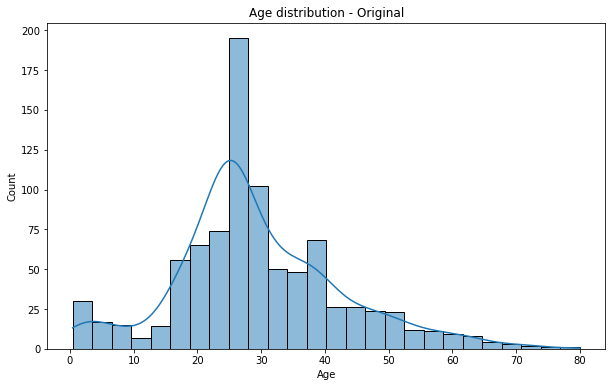

In [101]:
plt.subplots(figsize=(10,6))
sns.histplot(df_titanic_final['Age'], kde=True)
plt.title('Age distribution - Original')
plt.show()

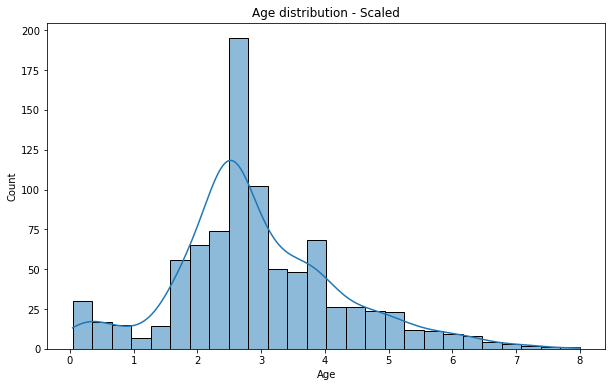

In [102]:
plt.subplots(figsize=(10,6))
sns.histplot(df_titanic_final['Age']/10, kde=True)
plt.title('Age distribution - Scaled')
plt.show()

### Normalization  
`transform the data into a proper normal distribution`

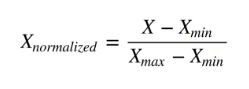

### Standardization 

X - meu /sigma 

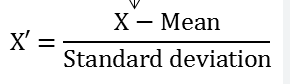

In [105]:
df_titanic_final['New Age'] = (df_titanic_final["Age"] - df_titanic_final["Age"].min())/(df_titanic_final['Age'].max() - df_titanic_final['Age'].min())

<ipython-input-105-68018cd0f9cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_titanic_final['New Age'] = (df_titanic_final["Age"] - df_titanic_final["Age"].min())/(df_titanic_final['Age'].max() - df_titanic_final['Age'].min())


In [106]:
df_titanic_final[['Age', 'New Age']]

Age   New Age
0    22.00000  0.271174
1    38.00000  0.472229
2    26.00000  0.321438
3    35.00000  0.434531
4    35.00000  0.434531
..        ...       ...
886  27.00000  0.334004
887  19.00000  0.233476
888  25.14062  0.310639
889  26.00000  0.321438
890  32.00000  0.396833

[891 rows x 2 columns]

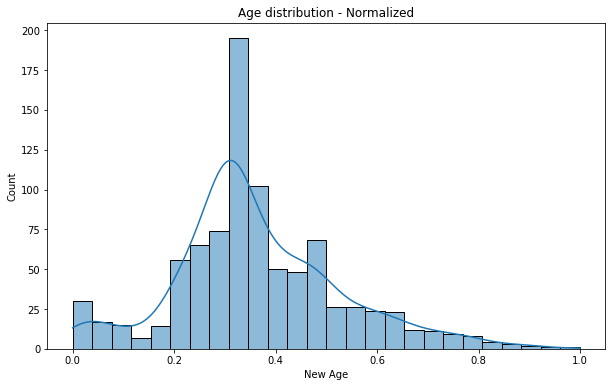

In [108]:
plt.subplots(figsize=(10,6))
sns.histplot(df_titanic_final['New Age'], kde=True)
plt.title('Age distribution - Normalized')
plt.show()

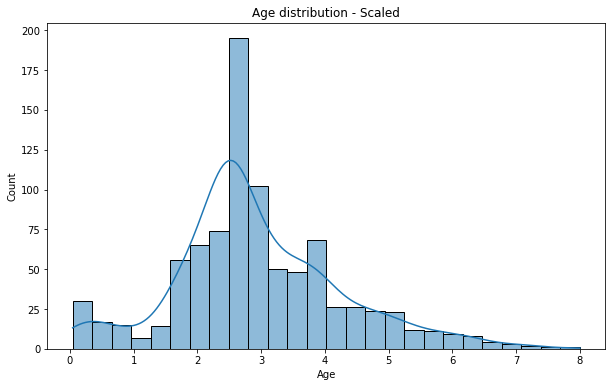

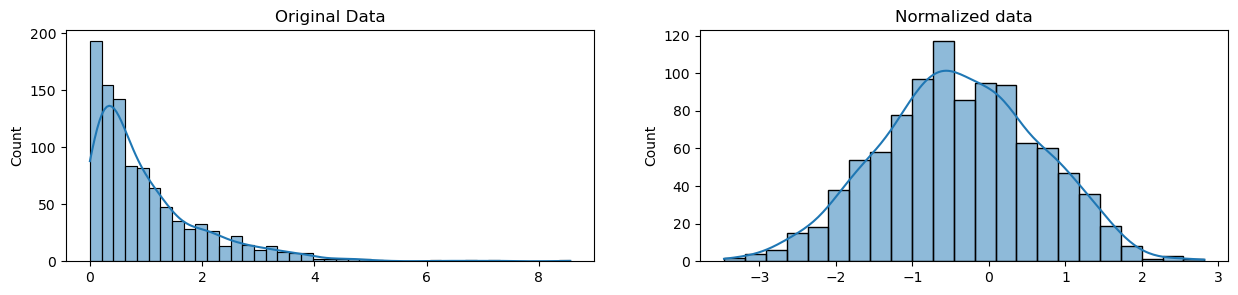